# OPTICS (Ordering Points To Identify Clustering Structure)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from sklearn.cluster import OPTICS
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_samples,
    silhouette_score,
)

In [2]:
df = pd.read_csv("../../../Datasets/ClusterPoints.csv")
df.head()

,X,Y
0,33,43
1,48,10
2,15,32
3,41,16
4,47,11


In [3]:
silhouette = []
calinski_harabasz = []
davies_bouldin = []
silhouette_s = []
for k in range(2, 11):
    optics = OPTICS(min_samples=k)
    cluster_labels = optics.fit_predict(df)
    silhouette.append(silhouette_score(df, cluster_labels))
    calinski_harabasz.append(calinski_harabasz_score(df, cluster_labels))
    davies_bouldin.append(davies_bouldin_score(df, cluster_labels))
    silhouette_s.append(silhouette_samples(df, cluster_labels))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_optics.py:1084: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


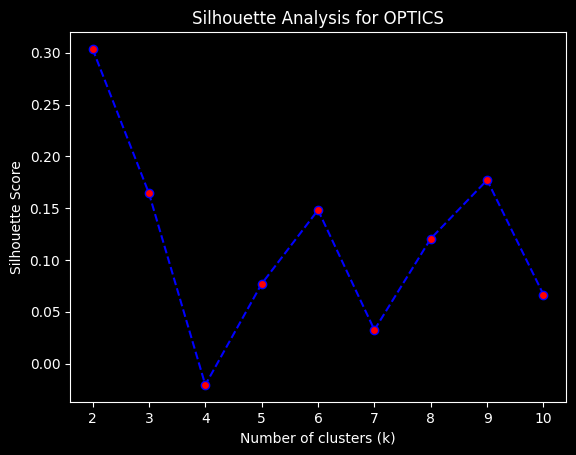

In [4]:
plt.plot(
    range(2, 11),
    silhouette,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for OPTICS")
plt.show()

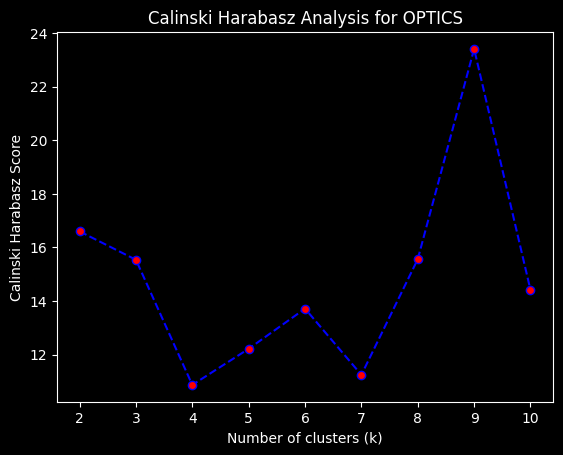

In [5]:
plt.plot(
    range(2, 11),
    calinski_harabasz,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Analysis for OPTICS")
plt.show()

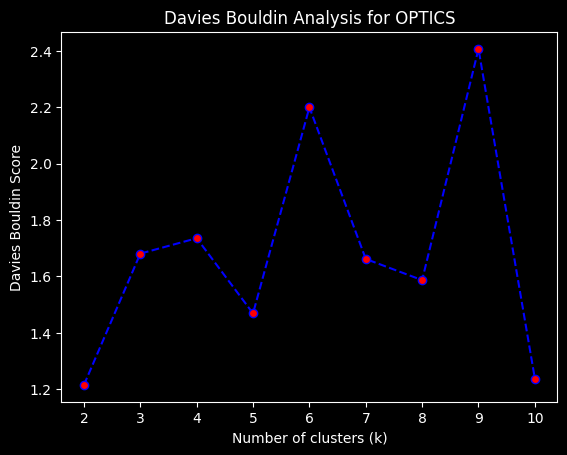

In [6]:
plt.plot(
    range(2, 11),
    davies_bouldin,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Analysis for OPTICS")
plt.show()

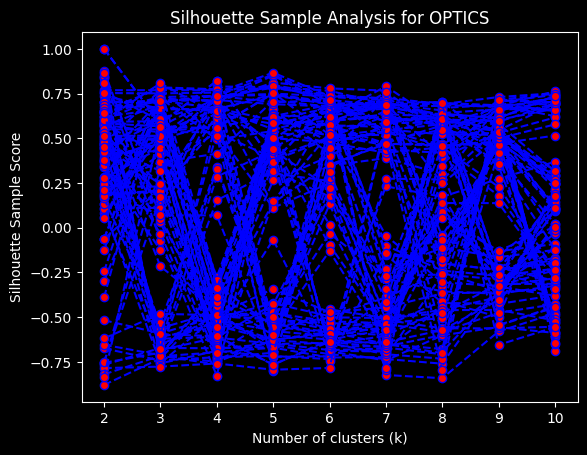

In [7]:
plt.plot(
    range(2, 11),
    silhouette_s,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(2, 11))
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Sample Score")
plt.title("Silhouette Sample Analysis for OPTICS")
plt.show()

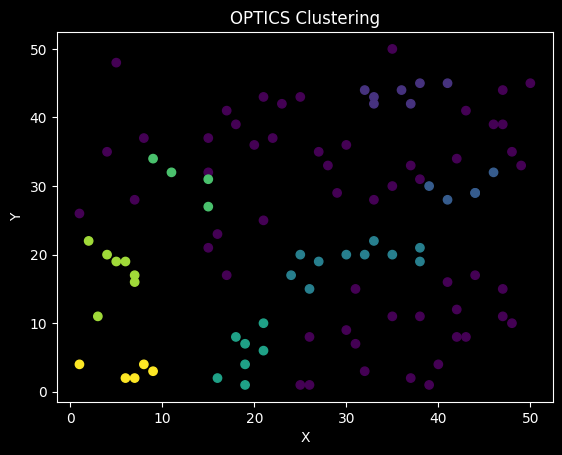

In [8]:
optics = OPTICS(min_samples=4)
cluster_labels = optics.fit_predict(df)
plt.scatter(df["X"], df["Y"], c=cluster_labels)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("OPTICS Clustering")
plt.show()

In [9]:
print("Silhouette Score :", silhouette_score(df, cluster_labels))
print("Calinski Harabasz Score :", calinski_harabasz_score(df, cluster_labels))
print("Davies Bouldin Score :", davies_bouldin_score(df, cluster_labels))
print("Silhouette Samples :", silhouette_samples(df, cluster_labels))

Silhouette Score : -0.020581370818369586
Calinski Harabasz Score : 10.865000536693847
Davies Bouldin Score : 1.7355711422762767
Silhouette Samples : [ 0.76842117 -0.27584135 -0.82700723 -0.4866491  -0.29682518 -0.55785462
 -0.54687182  0.78997689 -0.38649019  0.53454599  0.71690521 -0.70727468
  0.71692805  0.76913677 -0.46616161  0.71420942  0.73733035 -0.48400037
 -0.61020366  0.56569825  0.82122397  0.58719976 -0.49605094 -0.7232843
 -0.34586138  0.53042814 -0.68770975 -0.49282445  0.71199857  0.70780653
 -0.65308966 -0.40358363 -0.75042271 -0.73767151 -0.51951428  0.72671132
 -0.58743362 -0.7415795   0.66805908 -0.7257144  -0.46690032  0.70376693
  0.77453988 -0.46926238  0.73722429  0.66800221 -0.69637541 -0.46413172
  0.49415043  0.73077648 -0.72388773 -0.56684642 -0.4358708   0.53385126
 -0.33089136 -0.61358939  0.75587776  0.66209896  0.51316612 -0.70379742
  0.34022046  0.41421598 -0.50304152  0.63663922  0.7416249  -0.31764356
 -0.6755797   0.32622298  0.63092143 -0.31885976 

In [10]:
dump(optics, "../../../Models/OPTICS.joblib")

['../../../Models/OPTICS.joblib']